# Austin Pets Alive

## Import Libraries

In [ ]:
import os
import math
import cv2
import numpy as np
import pandas as pd
from imutils import paths
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [ ]:
def download_from_gdrive(file_id, file_name):
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget \
  --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
  'https://docs.google.com/uc?export=download&id=$file_id' -O- | \
  sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$file_id" \
  -O $file_name && rm -rf /tmp/cookies.txt
  clear_output(wait=True)

  print("{} downloaded!".format(file_name))

## Download Files

In [ ]:
# download dogs_data.zip file from google drive
download_from_gdrive("1RnjRqFo_36KGjzTbB_a9qL3SdglQPPnN", "dogs_data.zip")

dogs_data.zip downloaded!


In [ ]:
# download dogs.zip file from google drive
download_from_gdrive("1sM5Qm_ouTcvmLBf-GM2AJgwPAoGvXhhZ", "dogs.zip")

dogs.zip downloaded!


In [ ]:
# download dog_website_memos file
download_from_gdrive("1QF_xiqjT424KClAHYHpiJAFZPJx7sDOU", "dog_website_memos.csv")

dog_website_memos.csv downloaded!


## Unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip -qq dogs_data.zip
# ! unzip -qq dogs.zip

### Helper function

In [ ]:
def show_images(dog_internal_id, n_images, base_path='dogs'):
  """
  Displays images of dogs with given dog_internal_id and 
  number of images
  """
  base_path = base_path
  new_dir = os.path.join(base_path, str(dog_internal_id))
  image_paths = list(paths.list_images(new_dir))
  total_images = len(image_paths)
  text = ""
  if total_images < n_images:
    n_images = total_images
    # get random image indices
    random_indices = np.arange(total_images)
    text = "There're only {} images for this ID".format(total_images)
    if n_images == 1:
      text = "There's only {} image for this ID".format(total_images)
  else:
    # get random image indices
    random_indices = np.random.randint(len(image_paths), size=n_images)
  cols = 5
  rows = max(1, math.ceil(n_images/cols))
  # initialize figure
  fig = plt.figure(figsize=(15, 2*rows+3))
  for i, idx in enumerate(random_indices):
    fig.add_subplot(rows, cols, i+1)
    # read image
    image = cv2.imread(image_paths[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
  plt.tight_layout()
  plt.suptitle("Animal Internal ID: {}\n{}".format(dog_internal_id, text), fontsize=18,
               color='red')
  return plt.show()

## Count number of directories and images

In [ ]:
n_dog_classes = len(os.listdir('dogs'))
print("There are {} different directories".format(n_dog_classes))

There are 4922 different directories


In [ ]:
# get all the image paths
image_paths = list(paths.list_images('dogs'))
print("There are {} images of dogs".format(len(image_paths)))

There are 65913 images of dogs


In [ ]:
image_paths[:3]

['dogs/12393211/20190517083025.png',
 'dogs/12393211/20190802085532.png',
 'dogs/12393211/20190802085653.png']

## Load csv files

In [ ]:
# load the dogs data files
dogs = pd.read_csv('dog_data/dogs.csv')
dogs_photos = pd.read_csv('dog_data/dogs_photos.csv')
dogs_website_memos = pd.read_csv('dog_website_memos.csv') 
dogs.head()

,AnimalID,AnimalInternal-ID,AnimalName,AnimalType,AnimalSex,AnimalCurrentWeightPounds,AnimalDOB,AnimalBreed,AnimalColor,AnimalPattern
0,45628,1444011,Emma,Dog,Female,53.3,20150306,"Retriever, Yellow Labrador /Mix",Blond /None,NaN
1,45629,1444014,Rizzoli,Dog,Female,4.7,20161222,Mixed Breed (Small),Tan /None,NaN
2,45630,1444017,Isles,Dog,Female,3.1,20161222,Mixed Breed (Small),White /None,NaN
3,45631,1444020,Cory,Dog,Male,4.7,20161222,Mixed Breed (Small),Sable /None,NaN
4,45632,1444023,Topanga,Dog,Female,8.0,20161222,Mixed Breed (Small),Tan /None,NaN


In [ ]:
subset_ids = set(dogs_website_memos["AnimalInternal-ID"].tolist())
len(subset_ids)

5242

In [ ]:
subset = dogs[dogs['AnimalInternal-ID'].isin(subset_ids)]
subset.shape

(5242, 10)

Steps followed to create a subset data
- Used AnimalInternal-ID's from dogs_website_memos file
- dropped all nulls
- dropped AnimalPattern column
- merged with dogs_photos & dogs_website_memos
- total animal-internal ids: 5200

This new file contains all the columns of dogs.csv( except AnimalPattern) plus one link to the picture and memo text.

In [ ]:
subset.isna().sum()

AnimalID                        0
AnimalInternal-ID               0
AnimalName                      0
AnimalType                      0
AnimalSex                       1
AnimalCurrentWeightPounds       0
AnimalDOB                       0
AnimalBreed                     4
AnimalColor                     6
AnimalPattern                4888
dtype: int64

In [ ]:
subset = subset.dropna(subset=['AnimalSex', 'AnimalBreed', 'AnimalColor'])
subset.shape

(5234, 10)

In [ ]:
dogs_photos['AnimalInternal-ID'].nunique(), dogs['AnimalInternal-ID'].nunique()

(14961, 17212)

In [ ]:
dogs_photos_new = dogs_photos.drop_duplicates(subset=['AnimalInternal-ID'])
dogs_photos_new = dogs_photos_new[dogs_photos_new["AnimalInternal-ID"].isin(subset_ids)]
dogs_photos_new.shape

(5208, 2)

In [ ]:
subset = subset.drop('AnimalPattern', axis=1)
subset = subset.merge(dogs_photos_new, how="inner", on="AnimalInternal-ID")

In [ ]:
subset = subset.merge(dogs_website_memos.drop_duplicates(
    subset=['AnimalInternal-ID']
), how='inner', on='AnimalInternal-ID')

In [ ]:
dogs.dropna()['AnimalColor'].str.contains('None').sum()

198

In [ ]:
subset.to_csv("dogs_subset.csv", index=False)

In [ ]:
dogs_photos.head()

,AnimalInternal-ID,PhotoUrl
0,1444011,https://www.shelterluv.com/sites/default/files...
1,1444011,https://www.shelterluv.com/sites/default/files...
2,1444011,https://www.shelterluv.com/sites/default/files...
3,1444011,https://www.shelterluv.com/sites/default/files...
4,1444011,https://www.shelterluv.com/sites/default/files...


In [ ]:
dogs_website_memos.head()

,AnimalInternal-ID,MemoText
0,1468738,"""Meet Cornell, he's a social butterfly deluxe ..."
1,1468727,"""Shaya is a puppy with potential extraordinair..."
2,1468736,"""Would you like to love good Luna? She's a won..."
3,1470308,"""Stanley is a seasoned elder statesman who sti..."
4,1479031,"""Khaleesi is a purebred American Bulldog that..."


## Number of unique `AnimalInternal-ID` in `dog_photos.csv` file

This matches the total number of images we have in the dogs folder

In [ ]:
dogs_photos["AnimalInternal-ID"].nunique()

14961

In [ ]:
dogs_photos.shape

(65990, 2)

## Number of unique `AnimalInternal-ID` in `dogs.csv` file
This has some extra ID's (no photos available in dogs dir)

In [ ]:
dogs["AnimalInternal-ID"].nunique()

17212

In [ ]:
dogs_internal_ids = dogs_photos["AnimalInternal-ID"].unique()
len(dogs_internal_ids)

14961

In [ ]:
dogs[dogs['AnimalInternal-ID'] == 27150935]

,AnimalID,AnimalInternal-ID,AnimalName,AnimalType,AnimalSex,AnimalCurrentWeightPounds,AnimalDOB,AnimalBreed,AnimalColor,AnimalPattern
16021,87752,27150935,Leopold,Dog,Male,53.0,20190831,"Terrier, Pit Bull",Tan/None,Brindle


In [ ]:
# check the shape of the dogs dataframe
dogs.shape

(17212, 10)

## Filtering out AnimalInternal-ID without a photo

In [ ]:
# dogs whose info/photos are not available
dogs[~dogs["AnimalInternal-ID"].isin(dogs_internal_ids)]

,AnimalID,AnimalInternal-ID,AnimalName,AnimalType,AnimalSex,AnimalCurrentWeightPounds,AnimalDOB,AnimalBreed,AnimalColor,AnimalPattern
4,45632,1444023,Topanga,Dog,Female,8.00,20161222,Mixed Breed (Small),Tan /None,NaN
26,45682,1468318,Blake,Dog,Female,11.19,20161104,"Retriever, Labrador /Mix",Black /None,NaN
27,45683,1468320,Hanna,Dog,Female,7.10,20161104,"Retriever, Labrador /Mix",Black /None,NaN
28,45684,1468327,Romo,Dog,Male,58.00,20161104,"Retriever, Labrador /Mix",Black /None,NaN
29,45685,1468329,Starlight,Dog,Female,5.20,20161104,"Retriever, Labrador /Mix",Black /None,NaN
...,...,...,...,...,...,...,...,...,...,...
17206,91295,31636564,Darcia pup 7,Dog,Female,0.00,20201219,"Pyrenees, Great/Mix",NaN,NaN
17207,91296,31636578,Darcia pup 8,Dog,Female,0.00,20201219,"Pyrenees, Great/Mix",NaN,NaN
17208,91297,31636592,Darcia pup 9,Dog,Female,0.00,20201219,"Pyrenees, Great/Mix",NaN,NaN
17209,91298,31636602,Darcia pup 10,Dog,Female,0.00,20201219,"Pyrenees, Great/Mix",NaN,NaN


In [ ]:
# filter out dogs without information
final_dogs = dogs[dogs["AnimalInternal-ID"].isin(dogs_internal_ids)]

# verify the shape
final_dogs.shape

(14961, 10)

## Check for null columns
Four columns have null values:
- AnimalBreed (this can be determined)
- AnimalSex (this can be determined if we have a picture with *** visible)
- AnimalColor: (this can be determined)
- AnimalPattern: (93% values are null)

In [ ]:
final_dogs.isnull().sum()

AnimalID                         0
AnimalInternal-ID                0
AnimalName                       0
AnimalType                       0
AnimalSex                       14
AnimalCurrentWeightPounds        0
AnimalDOB                        0
AnimalBreed                     22
AnimalColor                     23
AnimalPattern                13915
dtype: int64

In [ ]:
# dogs with Breed name NaN
final_dogs[final_dogs.AnimalBreed.isna()]

,AnimalID,AnimalInternal-ID,AnimalName,AnimalType,AnimalSex,AnimalCurrentWeightPounds,AnimalDOB,AnimalBreed,AnimalColor,AnimalPattern
5190,57336,4004244,Pockets,Dog,Male,9.63,20151225,NaN,0 /None,NaN
5196,57357,4166740,Biggie Smalls,Dog,NaN,3.00,20180225,NaN,0 /None,NaN
5199,57360,4166774,Twinkle,Dog,Female,0.00,20180225,NaN,0 /None,NaN
6244,60550,6948612,Blondie,Dog,Unknown,74.50,20170108,NaN,NaN,NaN
6245,60551,6948702,Bandit,Dog,Unknown,62.30,20160606,NaN,NaN,NaN
6565,61320,7191704,Carlos,Dog,Unknown,41.80,20171201,NaN,NaN,Tick
6566,61321,7191772,Moana,Dog,Unknown,43.30,20171001,NaN,NaN,NaN
6567,61322,7191809,Tilly,Dog,Unknown,51.50,20170626,NaN,NaN,NaN
6568,61323,7192132,Taffy,Dog,Unknown,6.50,20180505,NaN,NaN,NaN
6610,61412,7205046,Trenton,Dog,Unknown,21.00,20180306,NaN,NaN,NaN


In [ ]:
id_no_breed_name = final_dogs[final_dogs.AnimalBreed.isna()]['AnimalInternal-ID'].values

In [ ]:
print("Images of dogs with unknown breed")
for ids in id_no_breed_name[:10]:
  show_images(ids, 5)

In [ ]:
final_dogs[final_dogs['AnimalInternal-ID'] == 10022501]

,AnimalID,AnimalInternal-ID,AnimalName,AnimalType,AnimalSex,AnimalCurrentWeightPounds,AnimalDOB,AnimalBreed,AnimalColor,AnimalPattern
8706,69474,10022501,Yoyo,Dog,Male,61.0,20121122,"Terrier, Pit Bull/Mix",White/None,NaN


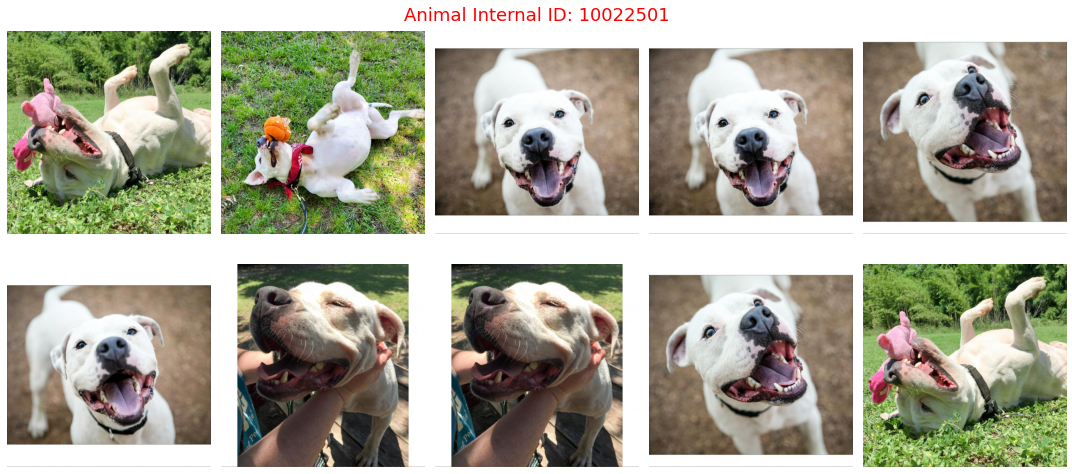

In [ ]:
show_images(10022501, 10)